# Exploratory Data Analysis (King County Housing)

## Loading the libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import rmse

%matplotlib inline

## Reading in the data

In [3]:
housing = pd.read_csv('data/King_County_House_prices_dataset.csv')

## Exploring the variables and values
Was everything loaded correctly? How does the data look like?

In [4]:
housing.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


What datatypes are there?

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

What variables might have non-continuous values?

In [6]:
housing.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

Low-count variables: bedrooms, bathrooms, floors, view

Binary: waterfront

Categorical (ordinal): condition, grade

Categorical (unordered/not linearly ordered): zipcode

## Data Cleaning

In [7]:
# one house apperently had 33 bedrooms but only 1.75 bathrooms
housing.bedrooms.replace(33, np.nan, inplace=True)
# one house apperently was build in the birth year of Jesus Christ
housing.yr_renovated.replace(np.NaN, 0, inplace=True)

In [8]:
housing.sqft_basement.replace('?', 0, inplace=True)
housing.sqft_basement = pd.Series(housing.sqft_basement, dtype='float64')

## Formatting the variables

Setting the date in the correct format

In [11]:
housing.date = pd.to_datetime(housing.date)
# checking for irregularities
print(housing.date.min() , ' to ' , housing.date.max())

2014-05-02 00:00:00  to  2015-05-27 00:00:00


Declaring the zipcode as a categorical variable

In [12]:
housing.zipcode = pd.Series(housing.zipcode, dtype='category')

The date of a renovation only matters when the building is old. And it probably matters more regarding the price than the original construction date. A lot of new buildiungs also are not renovated yet. Therefore a new variable is created.

In [13]:
yr_built_or_renovated = []
for row in range(housing.shape[0]):
    if housing.yr_renovated[row] > housing.yr_built[row]:
        yr_built_or_renovated.append(housing.yr_renovated[row])
housing['yr_built_or_renovated'] = pd.Series(yr_built_or_renovated)

In [14]:
condition_binary = []
for row in range(housing.shape[0]):
    if housing.condition[row] >= 3:
        condition_binary.append(1)
    else:
        condition_binary.append(0)
housing['condition_binary'] = pd.Series(condition_binary)

In [ ]:
Note that these two variables are created before splitting the dataset because they only contain information that is present within each row.

## Inspecting the distributions of the variables
Strongly summarised:

In [15]:
housing.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,yr_built_or_renovated,condition_binary
count,2.159700e+04,2.159700e+04,21596.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,744.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.371828,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,...,1788.596842,285.716581,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512,1995.928763,0.990786
std,2.876736e+09,3.673681e+05,0.904114,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,...,827.759761,439.819830,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950,15.599946,0.095550
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,...,370.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,1934.000000,0.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,...,1190.000000,0.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000,1987.000000,1.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,...,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000,2000.000000,1.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,...,2210.000000,550.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000,2007.250000,1.000000
max,9.900000e+09,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,...,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,1.000000


Convert the zipcode variable, so that seaborn can plot it as a histogram.

In [16]:
housing.zipcode.cat.as_ordered(inplace=True)

Show histograms of all variables

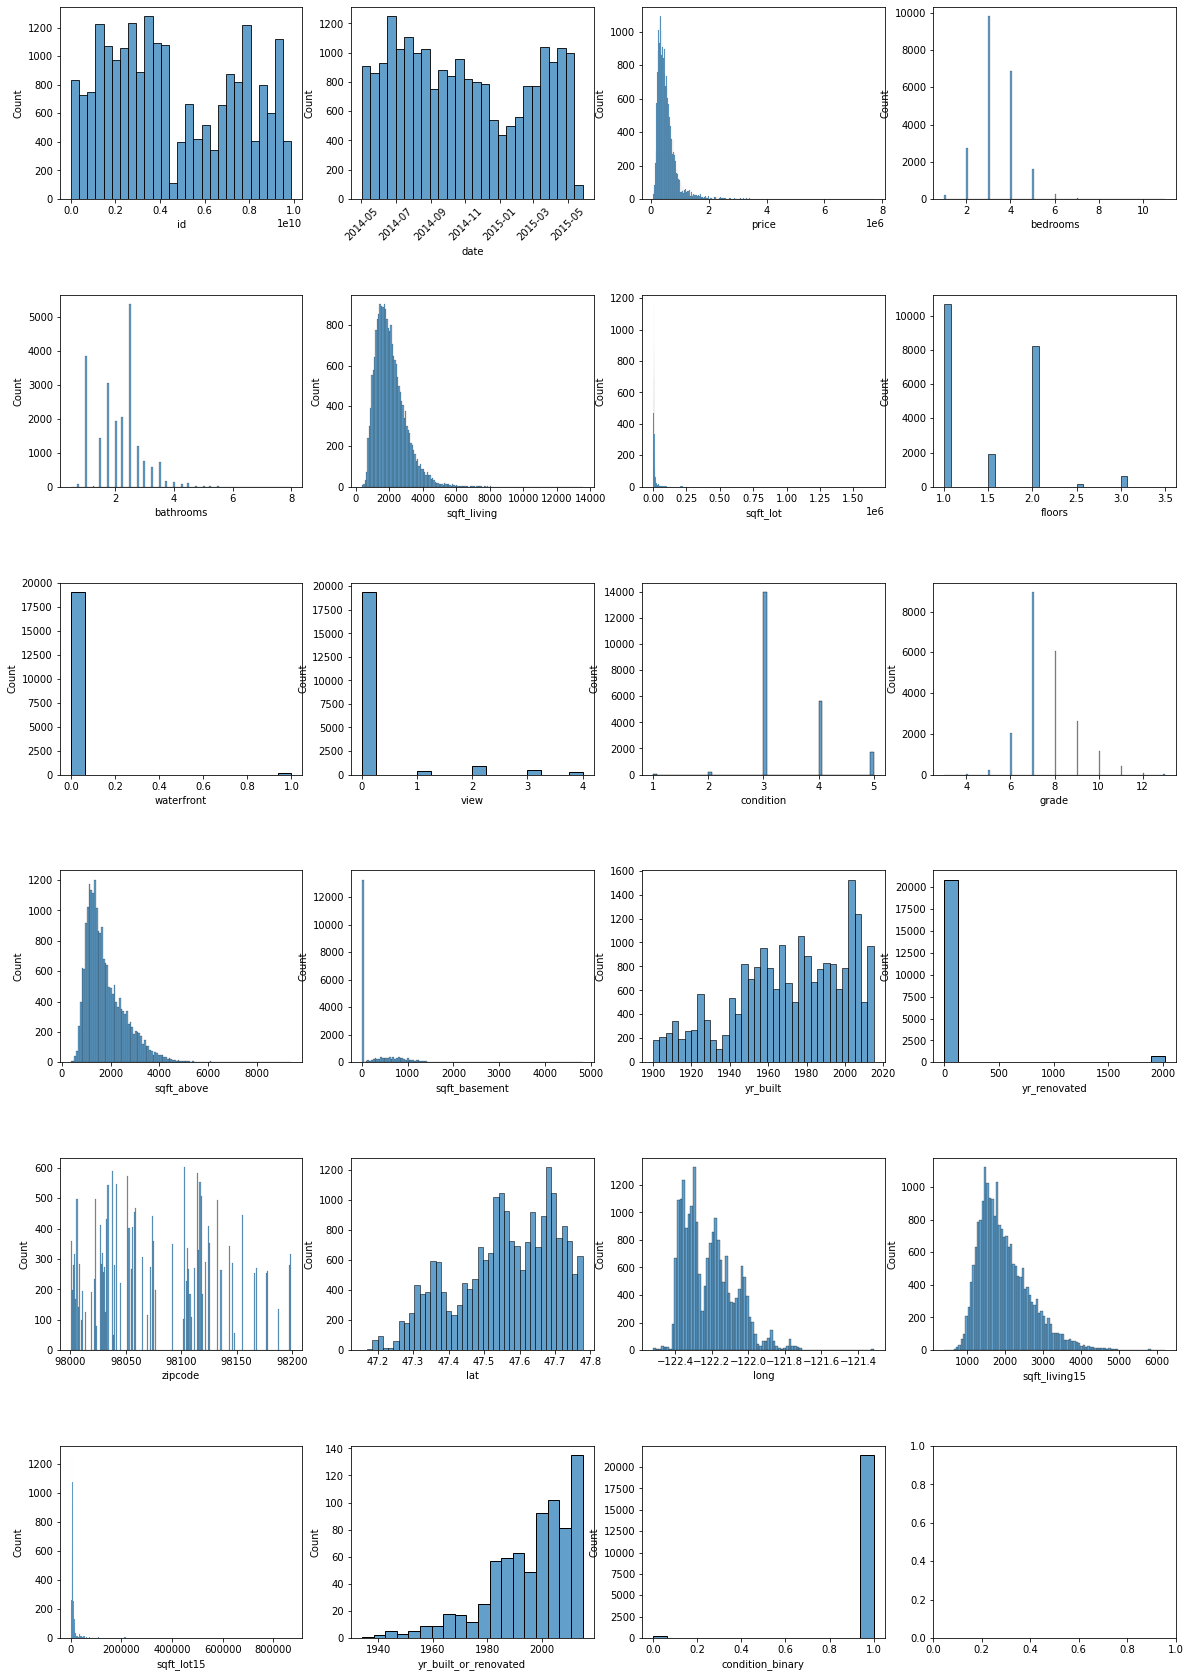

In [23]:
nrows = 4
fig, axs = plt.subplots(int(len(housing.columns)/nrows + 1), nrows, figsize=(20, 30))
for variable in range(len(housing.columns)):
    sns.histplot(housing,
                 x=housing.columns[variable], 
                 alpha = 0.7,
                 ax=axs[variable // nrows, variable % nrows])
plt.subplots_adjust(hspace = .5)
plt.sca(axs[0, 1])
plt.xticks(rotation = 45)

plt.show()

Show the correlations of the variables to the price in a graphical way (scatterplots)

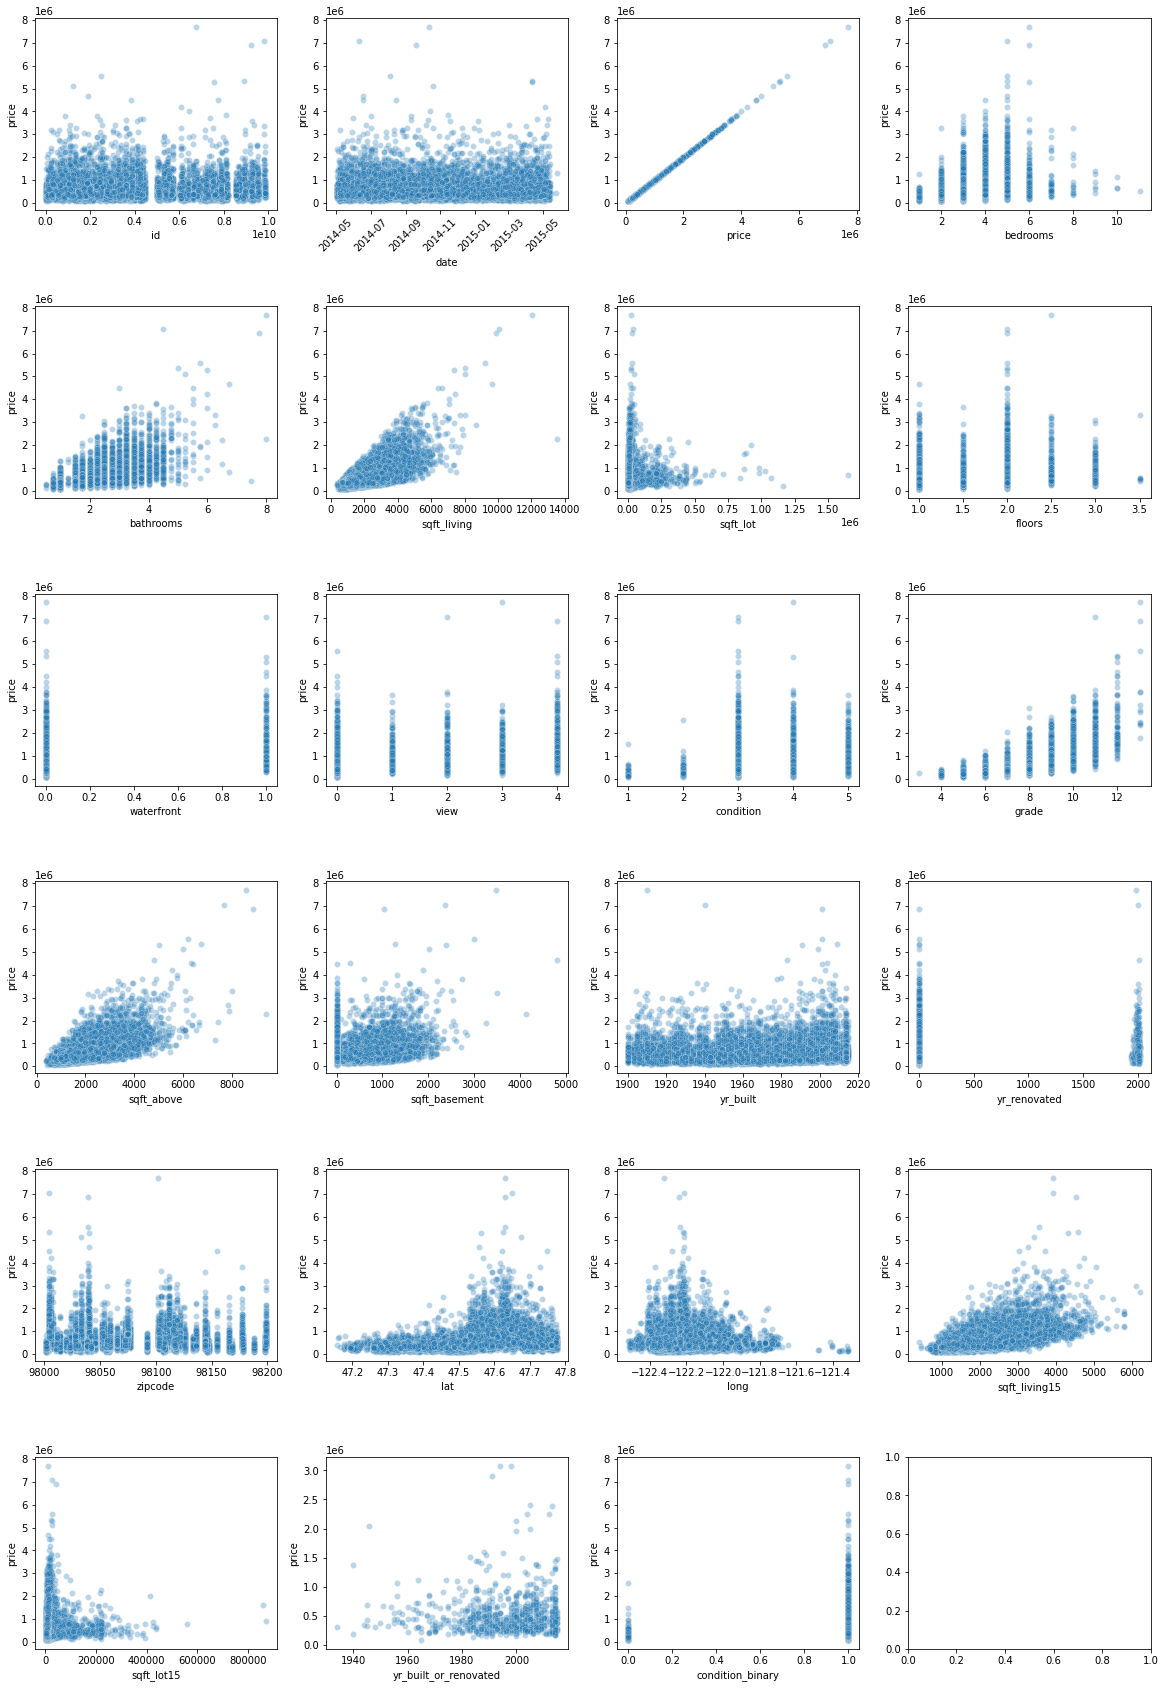

In [24]:
nrows = 4
# sns.set(style="darkgrid")
fig, axs = plt.subplots(int(len(housing.columns)/nrows + 1), nrows, figsize=(20, 30))
for variable in range(len(housing.columns)):
    sns.scatterplot(data=housing, 
                    x=housing.columns[variable], 
                    y='price', 
                    alpha = 0.3,
                    ax=axs[variable // nrows, variable % nrows])
plt.subplots_adjust(hspace = .5)
plt.sca(axs[0, 1])
plt.xticks(rotation = 45)

plt.show()

Show the strength of the correlation of the variables to the price (Pearson correlation coefficient / Pearson's r) as a heatmap

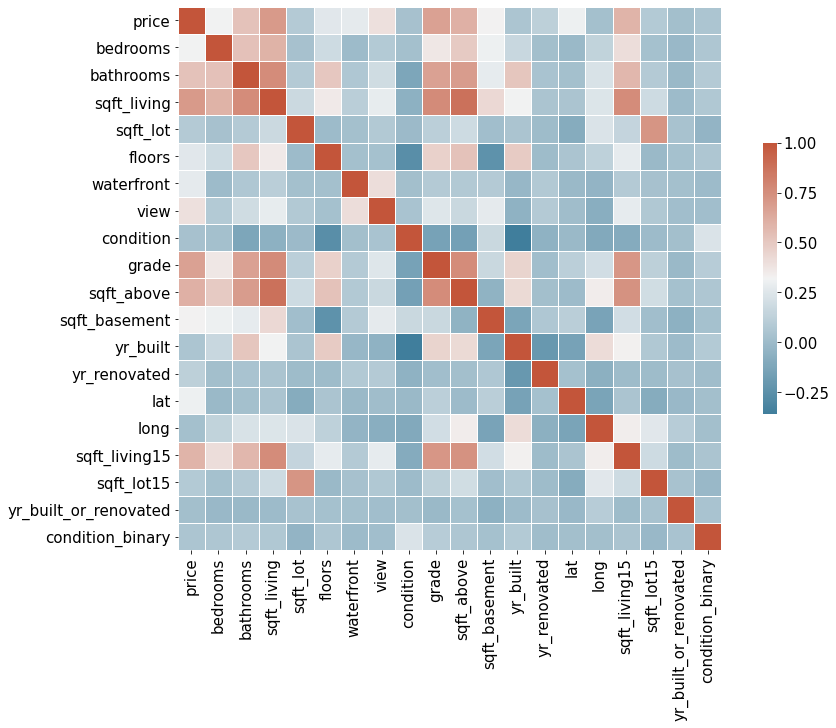

In [25]:
corr = housing.drop('id', axis=1).corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)

fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(corr,
            cmap=cmap, 
            linewidth=.5, 
            square=True, 
            cbar_kws={"shrink": 0.5},
            ax=ax)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

# fontsize of the color bar
cbar = ax.collections[0].colorbar
cbar.set_ticks([-.25, 0, .25, .5, .75, 1])
cbar.ax.tick_params(labelsize=15)

plt.show();

## Preparing the data for model fitting
This includes making a selection of variables that are either used to fit the model or to construct other variables that are later used to fit the model.

In [30]:
X = housing[[
                # helper variables
                'price',
                'zipcode',
                # variables to fit the model
                'bedrooms',
                'bathrooms',
                'sqft_living',
                'waterfront',
                'condition_binary',
                'grade',
                'yr_built_or_renovated',
                'view',
                'sqft_lot',
                'sqft_above',
                'sqft_basement',
                'sqft_living15'
            ]]

X = X.dropna(axis=0)

y = X.price

X = X.drop('price', axis=1)

Adding the constant (column vector of ones) to make the inference of a y-axis intercept possible

In [31]:
X = sm.add_constant(X)

## Splitting the dataset in a training and a test part

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Creating another meaningful variable (price per square foot)
Note that this variable is not used to fit the model for the price prediction, because it contains information that is unknown for the test data.

In [35]:
price_sqft = y_train / X_train.sqft_lot
X_train = X_train.assign(price_sqft=price_sqft)

## Average price per square foot for each zipcode
Note that this variable is created twice. Ince for the training data and once for the test data (using the averge prices per square foot for each zipcode as for the training data). This way, no information from the test data is used.

In [36]:
avg_price_sqft_zipcode_dict = X_train.groupby('zipcode').mean().price_sqft.reindex().to_dict()
avg_price_sqft_zipcode = X_train.zipcode.map(avg_price_sqft_zipcode_dict)
X_train = X_train.assign(avg_price_sqft_zipcode = avg_price_sqft_zipcode)
X_train.drop('price_sqft', axis=1, inplace=True)

In [37]:
avg_price_sqft_zipcode = X_test.zipcode.map(avg_price_sqft_zipcode_dict)
X_test = X_test.assign(avg_price_sqft_zipcode = avg_price_sqft_zipcode)

Making sure that there are no missing values

In [41]:
X_test = X_test.dropna(axis=0)
y_test = y_test.dropna(axis=0)
X_train = X_train.dropna(axis=0)
y_train = y_train.dropna(axis=0)

In [42]:
X_test = X_test.join(y_test, how='inner')
X_train = X_train.join(y_train, how='inner')

In [43]:
y_test = X_test.price
y_train = X_train.price
X_test = X_test.drop('price', axis=1)
X_train = X_train.drop('price', axis=1)

## Fitting a multiple linear regression model

In [44]:
model = sm.OLS(y_train, X_train)
fitted = model.fit()
fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     86.38
Date:                Mon, 07 Jun 2021   Prob (F-statistic):          3.77e-114
Time:                        10:14:38   Log-Likelihood:                -5867.4
No. Observations:                 436   AIC:                         1.176e+04
Df Residuals:                     421   BIC:                         1.183e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   2.836e+07   1.76e+07      1.612      0.108   -6.22e+06     6.3e+07
zipcode                 -294.4091    178.809     -1.647      0.100    -645.878      57.060
bedrooms               -1.196e+04    1.3e+04     -0.918      0.359   -3.76e+04    1.37e+04
bathrooms              -6.648e+04   1.79e+04     -3.708      0.000   -1.02e+05   -3.12e+04
sqft_living               59.5374    102.140      0.583      0.560    -141.230     260.305
waterfront              4.458e+05   9.87e+04      4.515      0.000    2.52e+05     6.4e+05
condition_binary       -1.719e+04   8.06e+04     -0.213      0.831   -1.76e+05    1.41e+05
grade                   4.128e+04   1.32e+04      3.134      0.002    1.54e+04    6.72e+04
yr_built_or_renovated     87.3343    533.430      0.164      0.870    -961.183    1135.852
view                    8.207e+04   1.39e+04      5.887      0.000    5.47e+04    1.09e+05
sqft_lot                   0.6947      0.314      2.210      0.028       0.077       1.313
sqft_above               142.4994    106.194      1.342      0.180     -66.236     351.235
sqft_basement            112.4501    104.266      1.078      0.281     -92.496     317.396
sqft_living15             57.7304     23.752      2.431      0.015      11.043     104.418
avg_price_sqft_zipcode  2378.8690    170.580     13.946      0.000    2043.574    2714.165
==============================================================================
Omnibus:                      247.702   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3406.062
Skew:                           2.133   Prob(JB):                         0.00
Kurtosis:                      16.011   Cond. No.                     2.12e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.12e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A strong multicolinearity is to be expected for such a high amount of variables. This does not necessarily harm the quality of the model unless the goal is to see how much each variable contributes to the prediction. 

## Predicting house prices

In [46]:
y_test_pred = fitted.predict(X_test)

## RMSE
Calculating the Root Mean Squared Error between the predicted values and the true values.

In [47]:
rmse(y_test, y_test_pred)

216573.85468120838

## Visualising errors

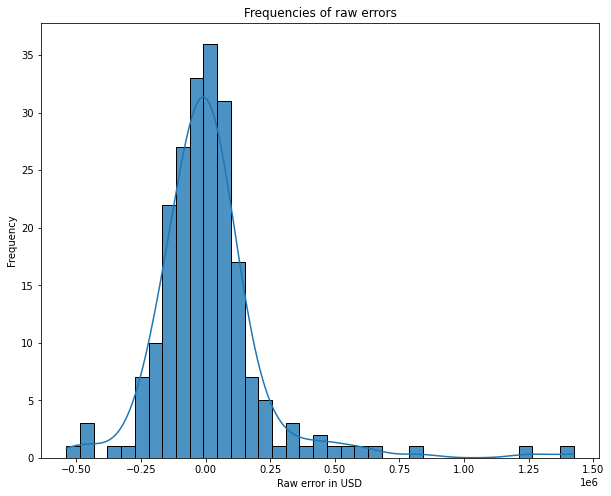

In [56]:
fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(y_test-y_test_pred,
            alpha = 0.8,
            kde =  True)
ax.set(xlabel='Raw error in USD', ylabel='Frequency', title='Frequencies of raw errors')
plt.show()

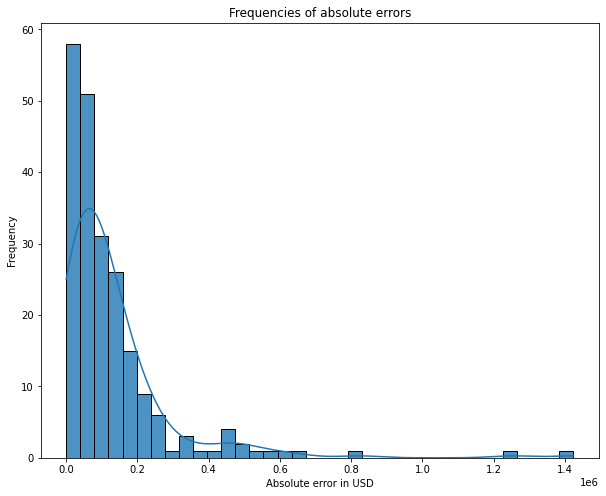

In [57]:
diff = abs(y_test - y_test_pred)

fig, ax = plt.subplots(figsize=(10,8))
sns.histplot(diff,
            alpha = 0.8,
            kde =  True)
ax.set(xlabel='Absolute error in USD', ylabel='Frequency', title='Frequencies of absolute errors')
plt.show()


Predicted values and fitted model (y-axis and blue line) versus the true values (x-axis)

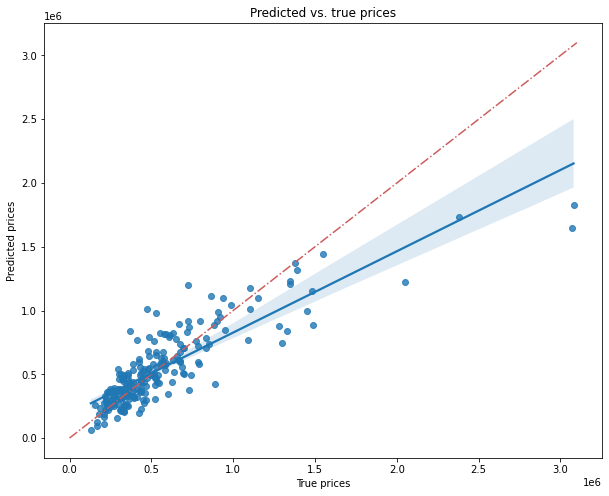

In [58]:
fig, ax = plt.subplots(figsize=(10, 8))

x=range(1,3200000,100000) 
plt.plot(x, x, '-.', color = 'indianred')  

sns.regplot(x=y_test, y=y_test_pred)
 #sns.regplot(x=y_test, y=y_test_pred, order=2, color='red', line_kws={'alpha':0.2}, scatter_kws={'alpha':0})
ax.set(xlabel='True prices', ylabel='Predicted prices', title='Predicted vs. true prices')
plt.show()

The model overestimates the prices of some of the cheaper houses and underestimates the very expensive houses. This is a strong indication for a too simple model. In this case, including an x**2 term in the model, would likely solve this problem. 

## Did the house prices increase during the time of data collection?

In [59]:
yr_survey = []
for row in range(housing.shape[0]):
    if housing.date[row].year >= 2015:
        yr_survey.append(1)
    else:
        yr_survey.append(0)

print(housing[pd.Series(yr_survey) == 0].price.mean())
print(housing[pd.Series(yr_survey) == 1].price.mean())

539350.9117767747
542279.0058781361


Apparently they did, but only slightly. The price per square foot living might be a more suitable variable. (If house prices per square foot rise, people might buy smaller houses to compensate)

In [61]:
housing['price_sqft'] = housing.price / housing.sqft_living

In [62]:
print(housing[pd.Series(yr_survey) == 0].price_sqft.mean())
print(housing[pd.Series(yr_survey) == 1].price_sqft.mean())

260.6334034141255
271.5014626753351


Exploring this using a linear regression and a frequentist approach. But first convert the date variable to be the number of days after start of the data collection, for simplicity.

In [64]:
housing['date_days'] = housing.date - housing.date.min()
housing['date_days'] = housing.date_days / np.timedelta64(1, 'D')

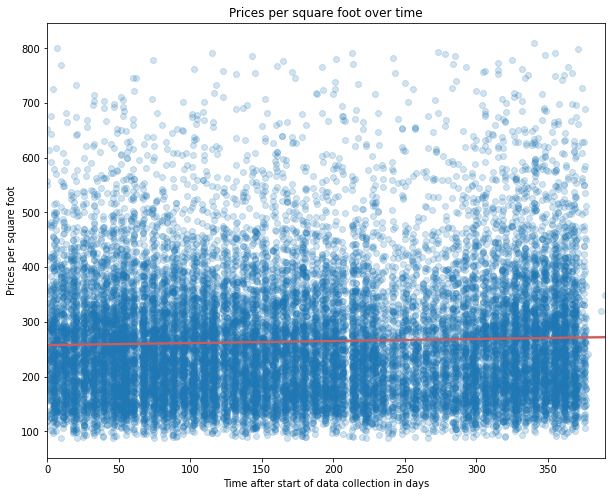

In [66]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(data=housing, 
            x='date_days', 
            y= 'price_sqft', 
            scatter_kws={'alpha': 0.2}, 
            line_kws={'color':'indianred'} )
ax.set(xlabel='Time after start of data collection in days', 
       ylabel='Prices per square foot', 
       title='Prices per square foot over time')
plt.show()

In [41]:
price_date = housing[['price_sqft', 'date_days']].dropna(axis=0)
sm.OLS(price_date.price_sqft, sm.add_constant(price_date.date_days) ).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             price_sqft   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     31.89
Date:                Sat, 05 Jun 2021   Prob (F-statistic):           1.65e-08
Time:                        14:53:58   Log-Likelihood:            -1.3214e+05
No. Observations:               21597   AIC:                         2.643e+05
Df Residuals:                   21595   BIC:                         2.643e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        257.4115      1.407    182.913      0.000     254.653     260.170
date_days      0.0374      0.007      5.647      0.000       0.024       0.050
==============================================================================
Omnibus:                     4525.228   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9389.081
Skew:                           1.239   Prob(JB):                         0.00
Kurtosis:                       5.072   Cond. No.                         400.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Obviously the R-squared value is very small because the model explains almost nothing of the variance in the data. The F-statistic (the p-value indicates that there might be a relationship).

## The Bayesian approach

In [69]:
import pystan
print(pystan.__version__)

2.19.1.1


The version of pystan is **really** important. Some commands do not work in the most recent version.

Rounding the variables

In [71]:
x = housing.date_days.round(0)
y = housing.price_sqft.round(3)

Pystan needs the data in a dictionary format.

In [73]:
my_data = {'N': len(x),
           'x': x,
           'y':y
          }

Creating a Stan Model from a separate file (easier to write/reuse there, can also be done in the python file)

In [74]:
sm = pystan.StanModel(file='linregress.stan')

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_2d2402fb1b0bc1cf06979fe56e60af76 NOW.


In [75]:
print(sm)

StanModel object 'anon_model_2d2402fb1b0bc1cf06979fe56e60af76' coded as follows:
data {
    int<lower=0> N; // nummber of datapoints
    vector[N] x; // covariates
    vector[N] y; // variates
}

parameters {
    real alpha;
    real beta;
    real <lower=0> sigma;
}

model {
    // priors
    alpha ~ normal(0,10);
    beta ~ normal(0,10);
    sigma ~ normal(0,10);
    
    y ~ normal(alpha + beta * x, sigma); // likelihood
}

// somehow the section below breaks the code
// generated quantities {
//     vector[N] y_sim; //simulated data based on the posterior
//     for(i in 1:N)
//         y_sim[i] = normal_rng(alpha + beta * x[i], sigma);
// }


Fitting the model

In [76]:
fit = sm.sampling(data=my_data, iter=1000, chains=4)

In [77]:
print(fit)

Inference for Stan model: anon_model_2d2402fb1b0bc1cf06979fe56e60af76.
4 chains, each with iter=1000; warmup=500; thin=1; 
post-warmup draws per chain=500, total post-warmup draws=2000.

        mean se_mean     sd   2.5%    25%    50%    75%  97.5%  n_eff   Rhat
alpha 252.52    0.05   1.39 249.84 251.56 252.49 253.48 255.24    818    1.0
beta    0.06  2.3e-4 6.7e-3   0.04   0.05   0.06   0.06   0.07    823    1.0
sigma 109.65    0.01   0.55 108.58 109.29 109.64 110.01 110.76   1492    1.0
lp__  -1.1e5    0.05   1.36 -1.1e5 -1.1e5 -1.1e5 -1.1e5 -1.1e5    659    1.0

Samples were drawn using NUTS at Mon Jun  7 11:19:46 2021.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [80]:
params = fit.extract()

This is how the extracted parameter look. They can be easily used to create plots afterwards.

In [81]:
params

OrderedDict([('alpha',
              array([250.62718907, 251.49911495, 252.89773079, ..., 253.08379214,
                     251.45293001, 253.33866726])),
             ('beta',
              array([0.06163206, 0.06229787, 0.05551736, ..., 0.05715988, 0.06308986,
                     0.05339772])),
             ('sigma',
              array([109.99423819, 109.62404539, 109.23180182, ..., 109.46977146,
                     109.33744513, 109.88507451])),
             ('lp__',
              array([-112680.13380617, -112679.10507867, -112679.15797882, ...,
                     -112679.22465738, -112679.39997881, -112679.12078589]))])

Distribution of the slope sampled from the posterior distribution.

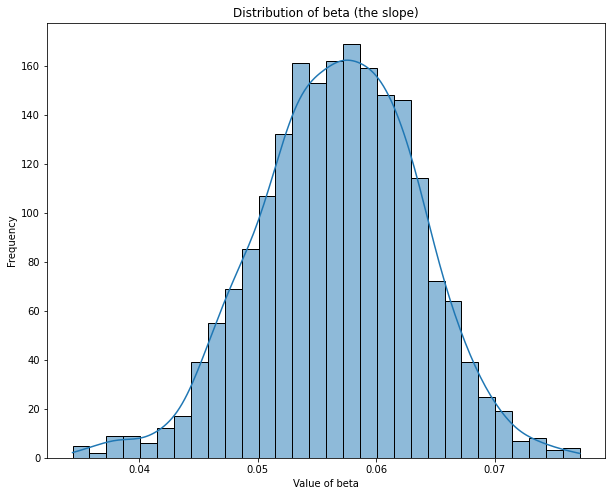

In [83]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(params['beta'], kde=True)
ax.set(xlabel='Value of beta', 
       ylabel='Frequency', 
       title='Distribution of beta (the slope)')
plt.show()


Most if not all sampled values of beta are greater than zero. Meaning it is very unlikely that the slope is zero or even negative.

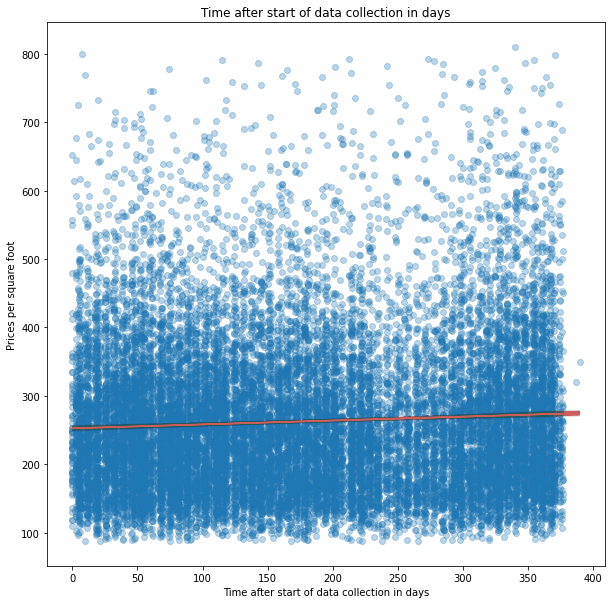

In [95]:
summary_dict = fit.summary()
df = pd.DataFrame(summary_dict['summary'], 
                  columns=summary_dict['summary_colnames'], 
                  index=summary_dict['summary_rownames'])

alpha_mean, beta_mean = df['mean']['alpha'], df['mean']['beta']

# Extracting traces
alpha = fit['alpha']
beta = fit['beta']
sigma = fit['sigma']
lp = fit['lp__']

fig, axes = plt.subplots(figsize=(10, 10))
# Plot a subset of sampled regression lines
for i in np.random.randint(0, len(alpha), 1000):
  plt.plot(x, alpha[i] + beta[i] * x, color='indianred', 
           alpha=0.005)

# Plot mean regression line

plt.scatter(x, y, alpha=0.3)
plt.plot(x, alpha_mean + beta_mean * x, color='indianred')
# plt.xlabel('$x$')
# plt.ylabel('$y$')
# plt.title('Fitted Regression Line')
# plt.xlim(x_min, x_max)
axes.set(xlabel='Time after start of data collection in days', ylabel='Prices per square foot', title='Time after start of data collection in days')
plt.show()

Note how close the 1000 sampled lines (red, high transparency) plot around the thick red line (the mean of the sampled parameters).